# Lab1: Gradient descent principles

**Carla Sendra Balcells**\
**Roxane Le Tensorer**

In [11]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Gradient descent method
#### 1.1. A simple quadratic function

We first begin with creating a function which does the gradient descent.

In [12]:
def grad_desc_convex(x0, fig, alpha, iters):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for k in range(iters):
        gradx = np.array([x0[0] * 2, x0[1] * 2])
        x0 = x0 - alpha * gradx
        fig.plot(*x0, 'r.')
    
    print("solution : %.3f, %.3f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    return fig

Then, we create another function to do the entire algorithm : the only parameter is alpha, so that we could change it easily.

In [13]:
def algorithm1(alpha):
    fig = plt.figure(figsize=(20,5))

    num_plots = 3
    base = 100 + num_plots * 10

    for i in range(num_plots):
        ax = fig.add_subplot(base+(1+i))

        X = np.arange(-2, 2, 0.05)
        Y = np.arange(-2, 2, 0.05)
        X, Y = np.meshgrid(X, Y)

        Z = X**2 + Y**2 
        ax.contour(X, Y, Z, 50)

        gradx = 2 * X
        grady = 2 * Y 
        ax.streamplot(X, Y, gradx, grady)

        iters = 100

        x_lim = 3.5
        x = x_lim*np.random.random(2) - x_lim/2
        ax = grad_desc_convex(x, ax, alpha, iters)

    plt.show()

We can now try the algorithm with different values for alpha. <br>
We decided to choose three random x0.<br>
The initial point is represented with a black dot, each step is represented with a red dot, and the minimum is represented with a blue cross.<br>
We also decided to write the solution above the graphs. <br>
First, as suggested, we try with $\alpha$ = 0.1

solution : 0.000, 0.000
solution : 0.000, -0.000
solution : -0.000, -0.000


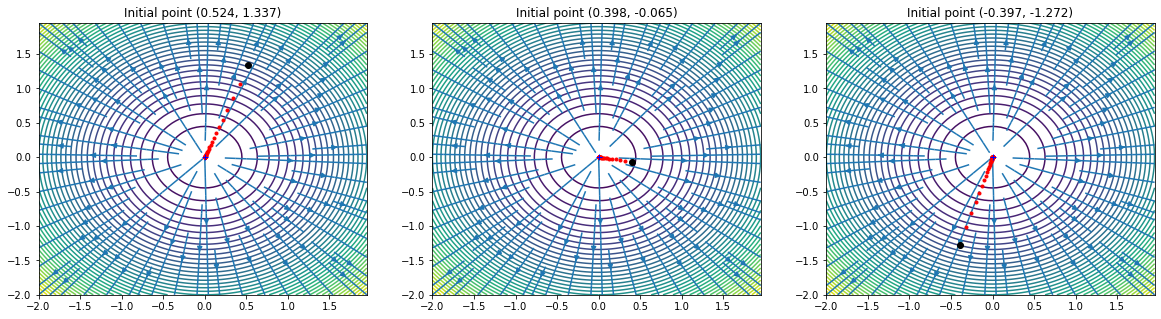

In [14]:
algorithm1(0.1)

We can see here that the algorithm a really efficient : in each of the three random x0, the result fits to the center, at least with a precision to the nearest thousandth. <br>

Now we can try with $\alpha \approx$ 1

solution : -1.746, 1.358
solution : 0.925, 1.439
solution : 0.846, -1.532


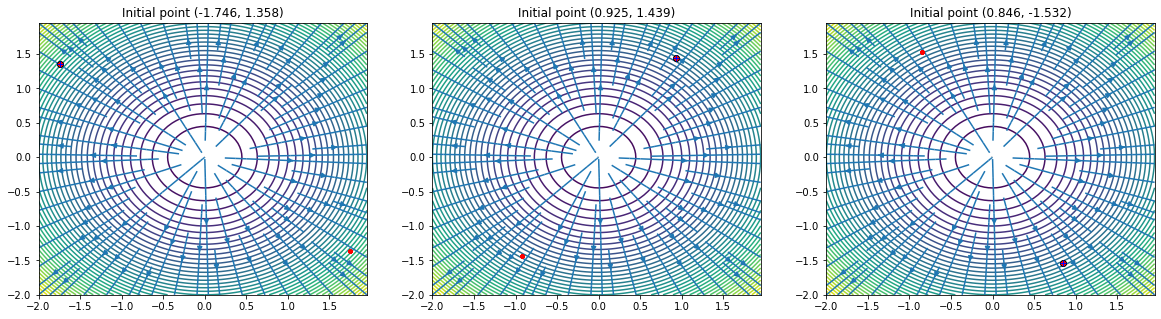

In [15]:
algorithm1(1)

This time, there seem to be a problem. This situation is very interesing, because the inverse of any gradient vectors in this case can be represented with a line whose middle is precisely the minimum of the fonction. That's the reason why, by having $\alpha$ = 1, the x is only going from one extremity of this line to the other, without having at any moment the possibility to reach the middle.<br>
We can now try with a value really close to 1 : 0.95

solution : -0.000, 0.000
solution : -0.000, -0.000
solution : 0.000, -0.000


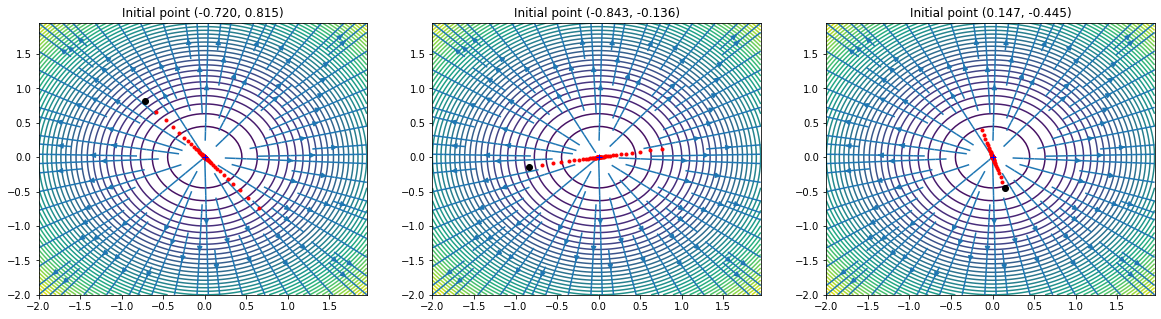

In [16]:
algorithm1(0.95)

In this situation, why can see that the algorithm achieves to reach the minimum, but this is very long because it always exceeds the solution and has to go back and forth, each time getting a little bit closer, until reaching the minimum.<br>
Finally, we can try this algorithm with $\alpha$ = 2 :

solution : 705732091168421551317557729105122457854364614656.000, 549823329712969757631287928071135891755798364160.000
solution : -760926699801428349768325659952591442177133903872.000, 681360412122937177601202366027871320612838309888.000
solution : -771986380732074382924500706850122287317845540864.000, -868056060795194451682278338297778753373577674752.000


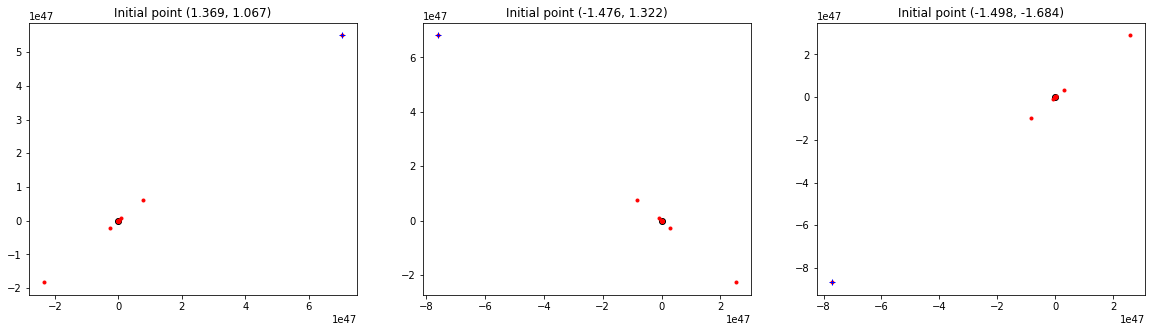

In [60]:
algorithm1(2)

As we could expect, with $\alpha$ > 1, it as totally impossible for the algorithm to reach the minimum, because it is always moving away from it. This is the reason why the result we obtain at the end has no sense. <br>
We can see then that is it necessary to have : 0 < $\alpha$ < 1. 

#### 1.2. A more complex function
We are now working on a more complex function, this is the reason why we decided to create first the function itself. It is absolutely not possible to guess which minima of this function are going to be found. 

In [39]:
def function(x):
    X=x[0]
    Y=x[1]
    return X**2 * (4 - 2.1*X**2 + X**4/3.0) + X*Y + Y**2*(-4+4*Y**2)
    

##### 1) Iterations
We begin with the simple algorithm, with only 100 iterations.

In [18]:
def grad_desc_non_convex(x0, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')

    for k in range(iters):
        gradx = np.array([2*x0[0]**5-8.4*x0[0]**3+8*x0[0]+x0[1], x0[0]+16*x0[1]**3-8*x0[1]])
        x0 = x0 - alpha * gradx
        fig.plot(*x0, 'r.')

    return fig


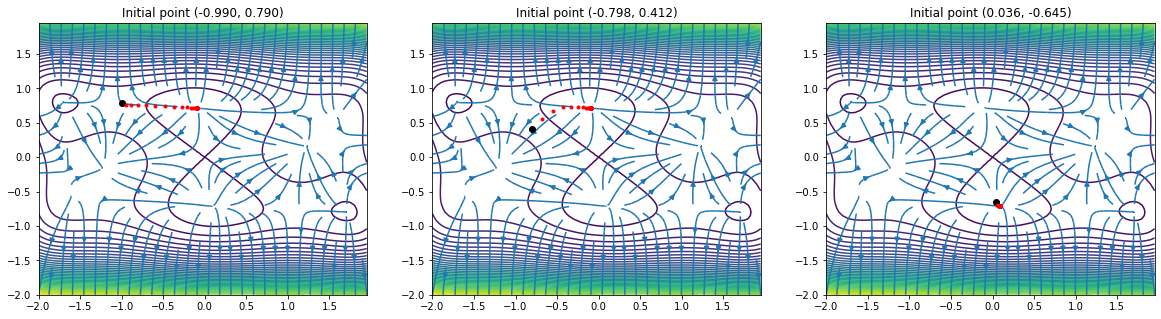

In [21]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5-8.4*X**3+8*X+Y
    grady = X+16*Y**3-8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    iters = 100
    
    x_lim = 2.
    x = x_lim*np.random.random(2) - x_lim/2
    
    alpha = 0.05
    ax = grad_desc_non_convex(x, ax, alpha, iters)

plt.show()

We can see here that the algorithm perfectly works, and each time the minimum which is found is located in the same valley as the original x. 

##### 2) Criterions

Now, we will create a new algorithm which will stop depending on some criterion. We decide here to write not only the solution, but also the number of iterations needed.

In [19]:
def grad_desc_non_convex_criterion(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    f0 = function(x)
    
    for i in range(iters):
        gradx = np.array([2*x[0]**5-8.4*x[0]**3+8*x[0]+x[1], x[0]+16*x[1]**3-8*x[1]])
        x1 = x - alpha * gradx
        f = function(x1)
        while (f>f0): 
            alpha = alpha/2
            x1 = x - alpha * gradx
            f = function(x1)
        f0=f    
        x=x1
        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-3) & (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig


number of points : 13
solution : 1.704, -0.796
number of points : 13
solution : -1.704, 0.796
number of points : 18
solution : -0.090, 0.713


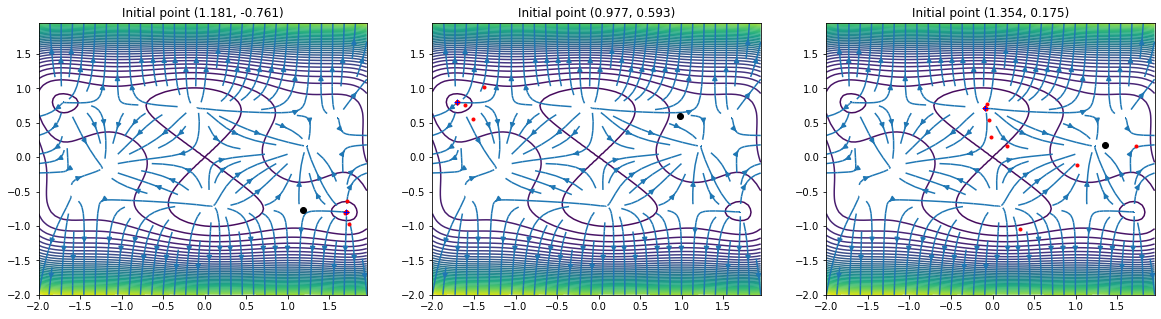

In [22]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots*10

for i in range(num_plots):
    ax = fig.add_subplot(base + (1 + i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    max_iters = 5000
    
    x_lim = 3.5
    x = x_lim*np.random.random(2) - x_lim/2
    alpha_init = 1
    ax = grad_desc_non_convex_criterion(x, ax, alpha_init, max_iters)

plt.show()

#### 1.3. The Rosenbrock function

In [23]:
def grad_desc_rosenbrock_criterion(x0, fig, alpha, num_iter, a, b):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = rosenbrock_function(x0)
    
    for i in range(num_iter):
        gradx = gradx = np.array([-2*(a-x0[0])-4*x0[0]*b*(x0[1]-x0[0]**2), 2*b*(x0[1]-x0[0]**2)])
        x = x0 - alpha * gradx
        f = rosenbrock_function(x)
        while (f>f0): 
            alpha = alpha/2
            x = x0 - alpha * gradx
            f = rosenbrock_function(x)

        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-3) & (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            fig.plot(*x, 'b+')
            break
        
        f0=f    
        x0=x

    return fig

In [24]:
def rosenbrock_function(x):
    X=x[0]
    Y=x[1]
    return (a-X)**2 + b*((Y-X**2)**2)
    

number of points : 9755
solution : 1.000, 1.000
number of points : 21043
solution : 1.000, 1.000


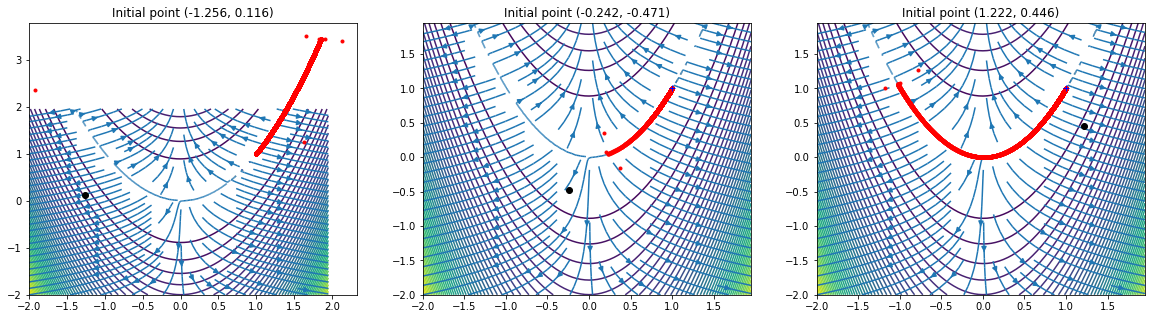

In [25]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots*10

a = 1
b = 100

for i in range(num_plots):
    ax = fig.add_subplot(base + (1 + i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = rosenbrock_function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = -2*(a-X)-4*X*b*(Y-X**2)
    grady = 2*b*(Y-X**2)
    ax.streamplot(X, Y, gradx, grady)
    
    max_iters = 50000
    
    x_lim = 3.
    x = x_lim*np.random.random(2) - x_lim/2
    alpha_init = 1.
    ax = grad_desc_rosenbrock_criterion(x, ax, alpha_init, max_iters, a, b)
    

plt.show()

### 1. Newton descent method
#### 1.1. A simple quadratic function

In [29]:
def function1(x):
    X=x[0]
    Y=x[1]
    return 100*X**2 + Y**2

In [30]:
def grad_desc_convex_criterion(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    f0 = function1(x)
    
    for i in range(iters):
        gradx = np.array([x[0]*200, x[1]*2])
        x1 = x - alpha * gradx
        f = function1(x1)
        while (f>f0): 
            alpha = alpha/2
            x1 = x - alpha * gradx
            f = function1(x1)
        f0=f    
        x=x1
        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-3) & (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig

number of points : 717
solution : 0.000, -0.000
number of points : 584
solution : 0.000, -0.000
number of points : 701
solution : 0.000, 0.000


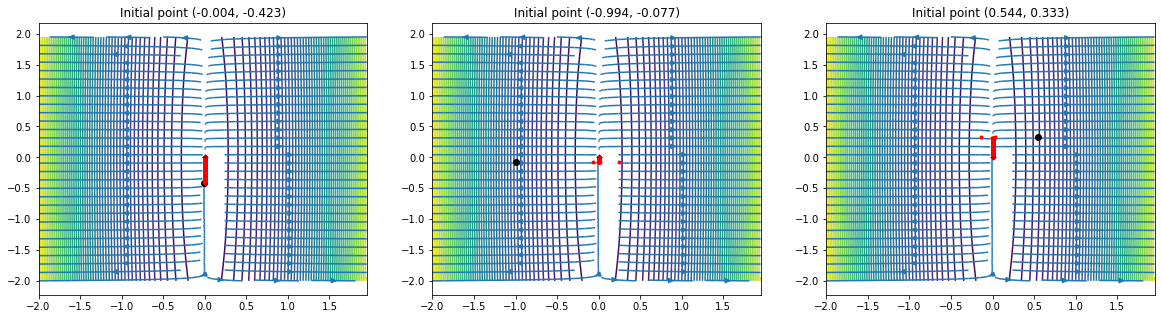

In [38]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function1(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = X*200
    grady = Y*2
    ax.streamplot(X, Y, gradx, grady)
    
    iters = 1000
    
    x_lim = 2.
    x = x_lim*np.random.random(2) - x_lim/2
    
    alpha = 0.05
    ax = grad_desc_convex_criterion(x, ax, alpha, iters)

plt.show()